# **e-Commerce (Target) Sales Dataset**

BY- TARINI PRASAD DAS


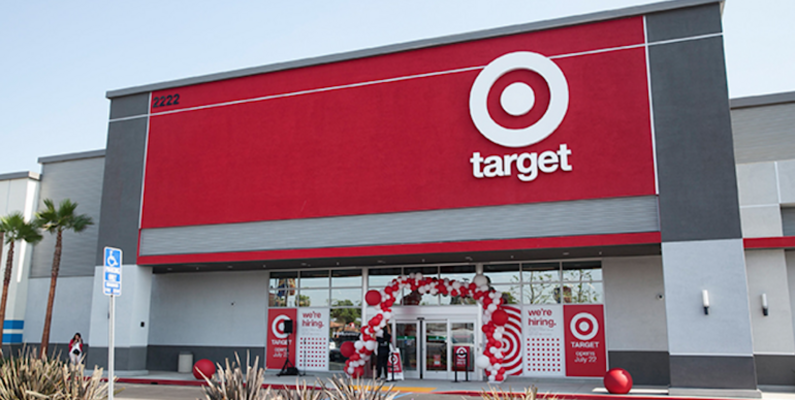

## **About Dataset**
Target is a globally recognized brand and a leading retailer in the United States, known for offering exceptional value, inspiration, innovation, and a unique shopping experience.

This dataset focuses on Target's operations in Brazil, covering 100,000 orders placed between 2016 and 2018. It includes detailed information on order status, pricing, payment and shipping performance, customer locations, product attributes, and customer reviews.

## Features

The data is available in 8 csv files:

### customers.csv
The `customers.csv` contains the following features:
- **customer_id:** ID of the consumer who made the purchase
- **customer_unique_id:** Unique ID of the consumer
- **customer_zip_code_prefix:** Zip Code of consumer’s location
- **customer_city:** Name of the City from where the order is made
- **customer_state:** State Code from where the order is made (e.g., São Paulo - SP)

### sellers.csv
The `sellers.csv` contains the following features:
- **seller_id:** Unique ID of the seller registered
- **seller_zip_code_prefix:** Zip Code of the seller’s location
- **seller_city:** Name of the City of the seller
- **seller_state:** State Code

### order_items.csv
The `order_items.csv` contains the following features:
- **order_id:** A Unique ID of the order made by the consumers
- **order_item_id:** A Unique ID given to each item ordered in the order
- **product_id:** A Unique ID given to each product available on the site
- **seller_id:** Unique ID of the seller registered in Target
- **shipping_limit_date:** The date before which the ordered product must be shipped
- **price:** Actual price of the products ordered
- **freight_value:** Price rate at which a product is delivered from one point to another

### geolocation.csv
The `geolocation.csv` contains the following features:
- **geolocation_zip_code_prefix:** First 5 digits of Zip Code
- **geolocation_lat:** Latitude
- **geolocation_lng:** Longitude
- **geolocation_city:** City
- **geolocation_state:** State

### payments.csv
The `payments.csv` contains the following features:
- **order_id:** A Unique ID of the order made by the consumers
- **payment_sequential:** Sequences of the payments made in case of EMI
- **payment_type:** Mode of payment used (e.g., Credit Card)
- **payment_installments:** Number of installments in case of EMI purchase
- **payment_value:** Total amount paid for the purchase order

### orders.csv
The `orders.csv` contains the following features:
- **order_id:** A Unique ID of the order made by the consumers
- **customer_id:** ID of the consumer who made the purchase
- **order_status:** Status of the order made, i.e., delivered, shipped, etc.
- **order_purchase_timestamp:** Timestamp of the purchase
- **order_delivered_carrier_date:** Delivery date at which the carrier made the delivery
- **order_delivered_customer_date:** Date at which the customer received the product
- **order_estimated_delivery_date:** Estimated delivery date of the products

### products.csv
The `products.csv` contains the following features:
- **product_id:** A Unique identifier for the proposed project
- **product_category_name:** Name of the product category
- **product_name_length:** Length of the string which specifies the name given to the products ordered
- **product_description_length:** Length of the description written for each product ordered on the site
- **product_photos_qty:** Number of photos of each product ordered available on the shopping portal
- **product_weight_g:** Weight of the products ordered in grams
- **product_length_cm:** Length of the products ordered in centimeters
- **product_height_cm:** Height of the products ordered in centimeters
- **product_width_cm:** Width of the product ordered in centimeters

## Potential Use Cases
Analyzing this dataset offers valuable insights into Target's Brazilian operations, revealing details about order processing, pricing strategies, payment and shipping efficiency, customer demographics, product characteristics, and customer satisfaction. This comprehensive dataset is a valuable resource for understanding various business aspects and enhancing strategic decision-making.

## Dataset Schema

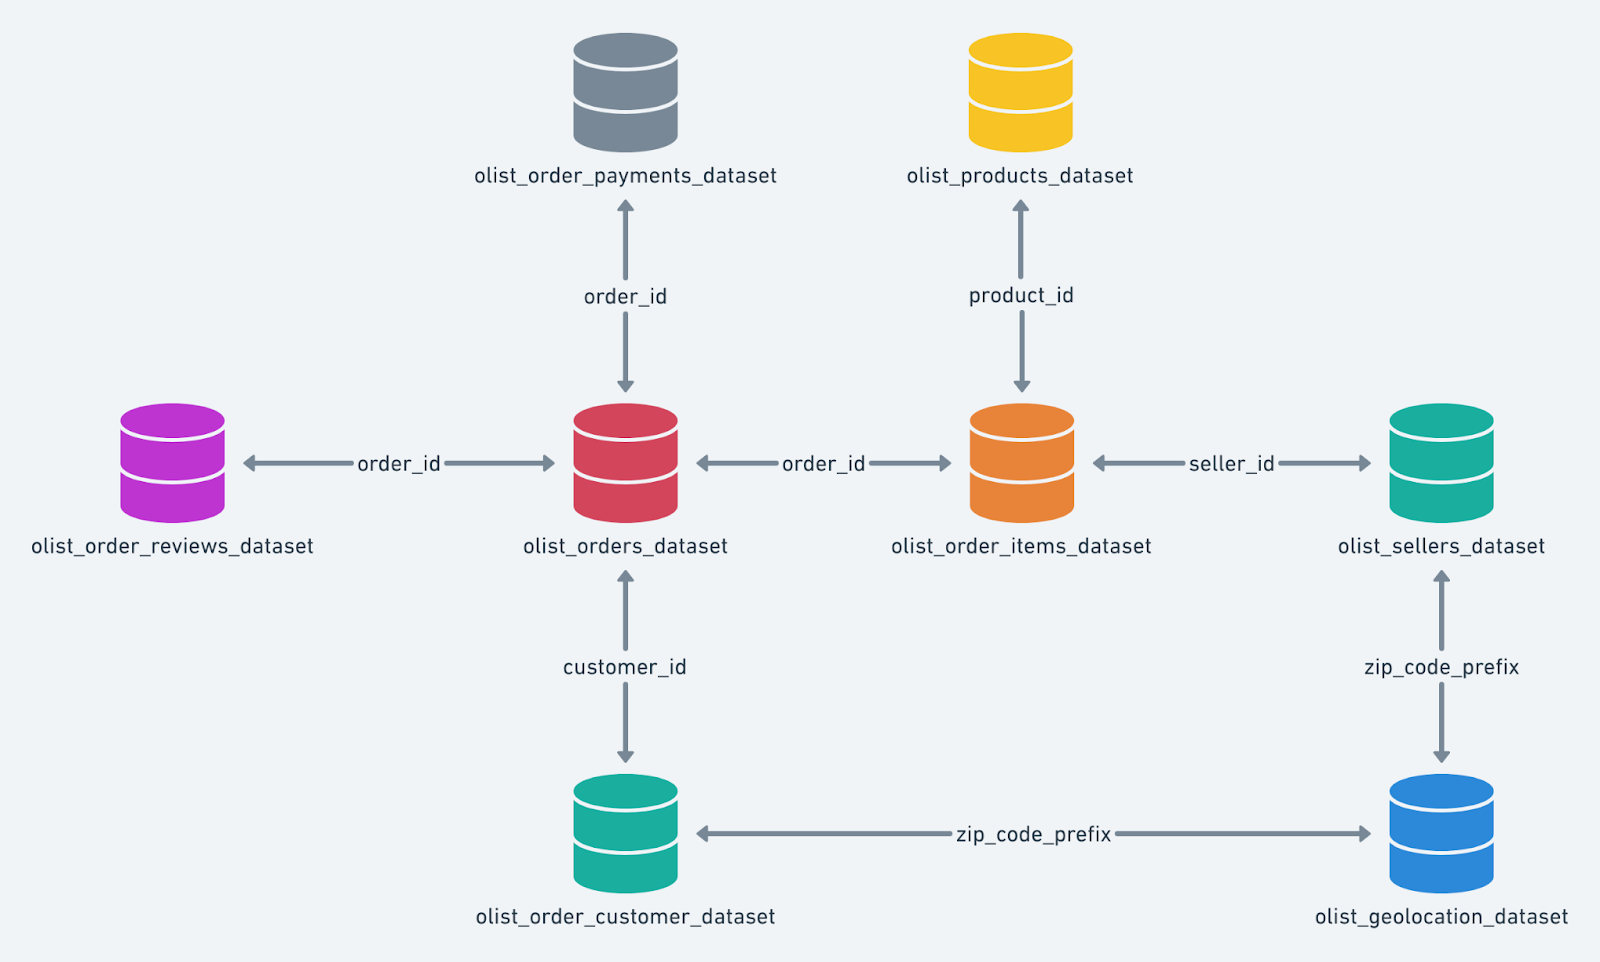

## Establishing the connection between mysql and python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Kanha@8144",
                            database = "e_Commerce")

cur = db.cursor()



## Basic Questions

### 1. Order Volume :
 - How many orders were placed each year (2016, 2017, 2018)?

In [2]:
query = """SELECT YEAR(order_purchase_timestamp) AS year,
        COUNT(order_id) AS order_count
        FROM orders
        GROUP BY year
        ORDER BY year"""
cur.execute(query)
orders = cur.fetchall()

df = pd.DataFrame(orders,columns=['year','order_count'])
df.head()

,year,order_count
0,2016,329
1,2017,45101
2,2018,54011


The order data from 2016 to 2018 demonstrates a clear and substantial growth in Target's Brazilian operations. The number of orders has escalated from a modest start in 2016 to a robust performance in 2017 and 2018. This trend reflects positive business development and customer engagement over these years. Further analysis can be conducted to understand the factors driving this growth, such as changes in marketing strategies, improvements in logistics, or expansion of product offerings.


### 2.Top-Selling Products:

- What are the top 10 best-selling products?

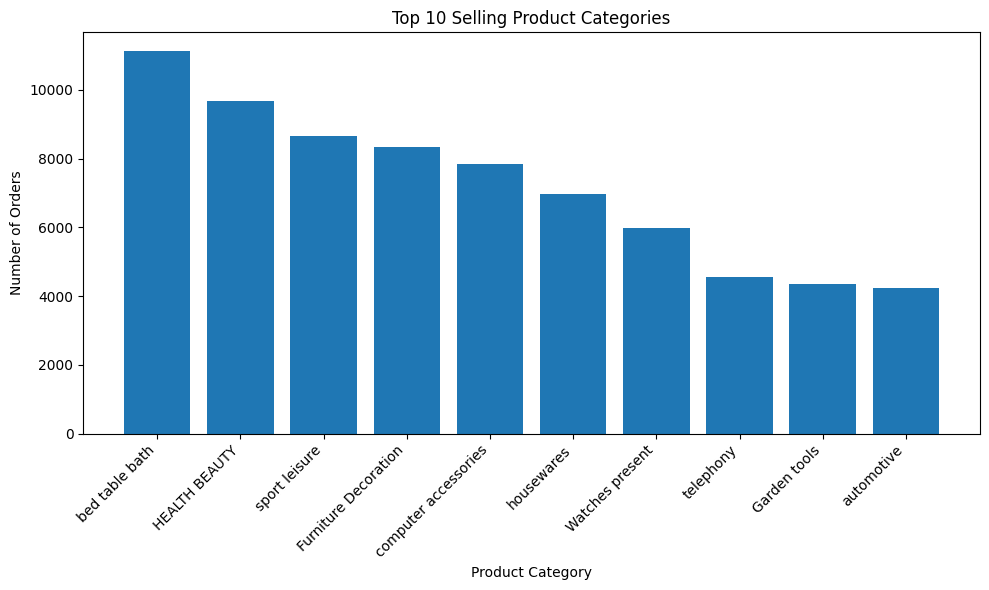

In [3]:
query = """SELECT p.product_category, COUNT(oi.order_id) AS order_count
FROM products p
JOIN order_items oi ON p.product_id = oi.product_id
GROUP BY p.product_category
ORDER BY order_count DESC
LIMIT 10
 """
cur.execute(query)
top_selling = cur.fetchall()


top_selling_products=pd.DataFrame(top_selling,columns=['product_category','order_count'])
top_selling_products


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_selling_products['product_category'], top_selling_products['order_count'])
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.title('Top 10 Selling Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The top-selling categories for Target Brazil between 2016 and 2018 are diverse, ranging from household essentials like Bed, Table, Bath and Furniture Decoration to popular consumer electronics such as Computer Accessories and Telephony. Health and Beauty also performed strongly, reflecting sustained consumer interest in personal care products. These insights highlight opportunities for Target Brazil to optimize inventory and marketing strategies to meet varied consumer demands effectively.

### 3.Customer Distribution:

- How many unique customers placed orders?

In [4]:
query = """SELECT COUNT(DISTINCT customer_id) AS unique_customers
FROM orders
 """
cur.execute(query)
data = cur.fetchall()
unique_customers=data[0][0]
print(f"{unique_customers} unique customers placed orders")

99441 unique customers placed orders


### 4.Order Status:

- What is the distribution of order statuses (e.g., delivered, canceled, etc.)?



In [5]:
query = """SELECT order_status, COUNT(order_id) AS status_count
FROM orders
GROUP BY order_status
ORDER BY status_count DESC

 """
cur.execute(query)
data = cur.fetchall()
order_status=pd.DataFrame(data,columns=['order_status','status_count'])
order_status




,order_status,status_count
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


The distribution of order statuses reveals a significant imbalance, with the vast majority (96,478) being 'delivered'. This indicates a high success rate in order fulfillment. However, the 'shipped', 'canceled', and 'unavailable' statuses, although much less frequent, highlight areas for potential improvement in the logistics and inventory management processes. The minimal counts for 'created' and 'approved' suggest these statuses are either rare or quickly transition to other stages.

### 5. Total unique cities where customers are located.

In [6]:
query = """ select COUNT(distinct customer_city) from customers """

cur.execute(query)

data= cur.fetchall()
    
city_count= data[0][0]

print(f"There are total {city_count} unique cities where customers are located.")

There are total 4119 unique cities where customers are located.


### 6.Calculate the percentage of orders that were paid in installments.

In [7]:
query = """ select ((sum(case when payment_installments >= 1 then 1
else 0 end))/count(*))*100 from payments
"""

cur.execute(query)

data = cur.fetchall()
installment_percentage=data[0][0]
print(f"The percentage of orders that were paid in installments is {installment_percentage}." )

The percentage of orders that were paid in installments is 99.9981.


### 7. Count the number of customers from each state.

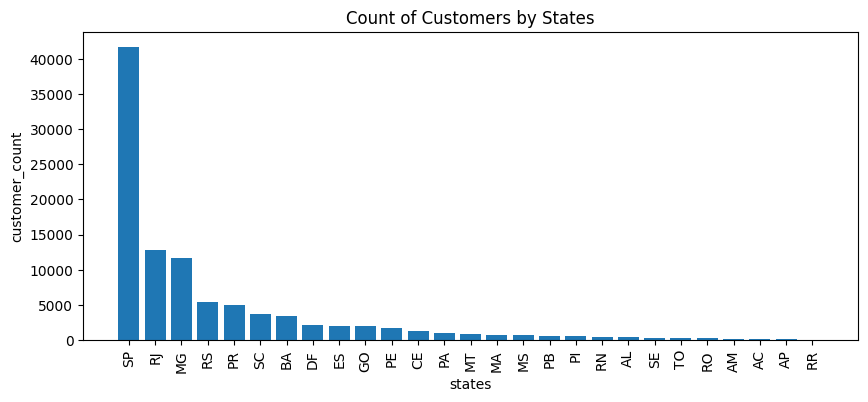

In [8]:
query = """ select customer_state ,count(customer_id)
from customers group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count" ])
df = df.sort_values(by = "customer_count", ascending= False)

plt.figure(figsize = (10,4))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

The data represents the top 10 states with the highest number of customers. São Paulo (SP) leads by a significant margin with 41,746 customers, indicating it is the primary market. Rio de Janeiro (RJ) and Minas Gerais (MG) follow with 12,852 and 11,635 customers, respectively, showcasing strong customer bases. Other states like Rio Grande do Sul (RS), Paraná (PR), Santa Catarina (SC), and Bahia (BA) have smaller but still notable customer counts. This distribution suggests a concentration of customers in specific regions, particularly in São Paulo, which could inform targeted marketing and resource allocation strategies.


## Intermediate Questions

### 1.Payment Methods:

- What are the most common payment methods used by customers?

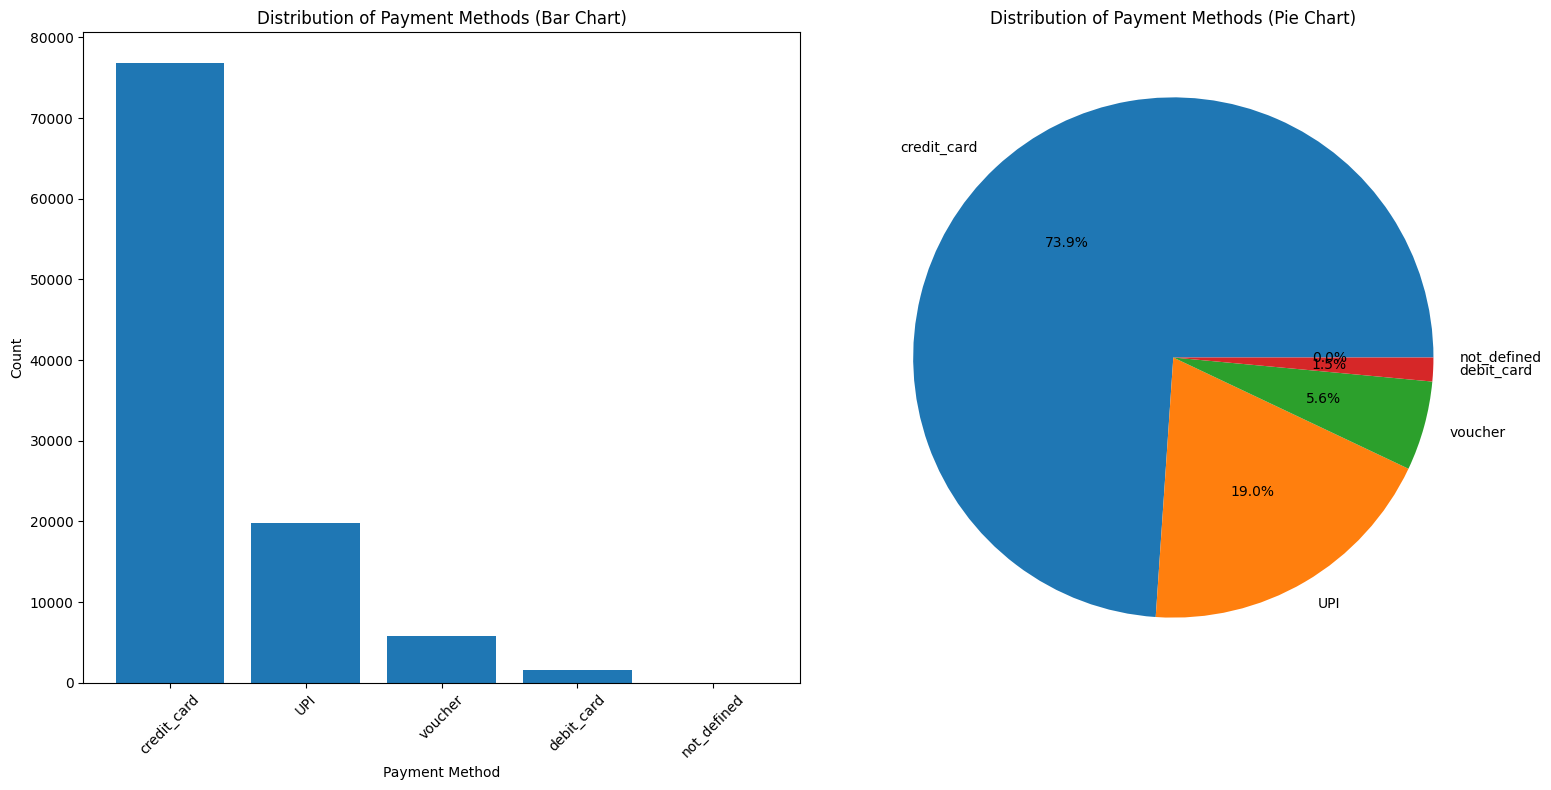

In [9]:
query = """SELECT payment_type, COUNT(order_id) AS payment_count
FROM payments
GROUP BY payment_type;
 
 """
cur.execute(query)
data = cur.fetchall()
payment_methods=pd.DataFrame(data,columns=['payment_type','payment_count'])
payment_methods

# Creating the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plotting the bar chart
ax[0].bar(payment_methods['payment_type'], payment_methods['payment_count'])
ax[0].set_xlabel('Payment Method')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Payment Methods (Bar Chart)')
ax[0].tick_params(axis='x', rotation=45)


     
# Plotting the pie chart
ax[1].pie(payment_methods['payment_count'], labels=payment_methods['payment_type'], autopct='%1.1f%%', startangle=0)
ax[1].set_title('Distribution of Payment Methods (Pie Chart)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Based on the data, the most common payment method used by customers is credit card, accounting for a substantial 76,795 transactions. UPI follows with 19,784 transactions, while vouchers and debit cards are less frequently used with 5,775 and 1,529 transactions, respectively. The 'not_defined' category has minimal usage, indicating either rare cases or data entry issues. To optimize the payment process, focus on enhancing credit card and UPI experiences, while investigating the 'not_defined' entries for potential improvements.

###  2.Delivery Time Analysis:

- What is the average delivery time for orders?

In [10]:
query = """SELECT ROUND(AVG(DATEDIFF(order_delivered_customer_date, order_purchase_timestamp)),0) AS avg_delivery_time
FROM orders
WHERE order_delivered_customer_date IS NOT NULL
 """
cur.execute(query)
data = cur.fetchall()
average_delivery_time = data[0][0]  # Extract the value from the tuple

# Print the formatted output
print(f"The average time to deliver each order is {average_delivery_time} days.")

The average time to deliver each order is 12 days.


### 3. Product Categories:

- Which product categories generate the most revenue?





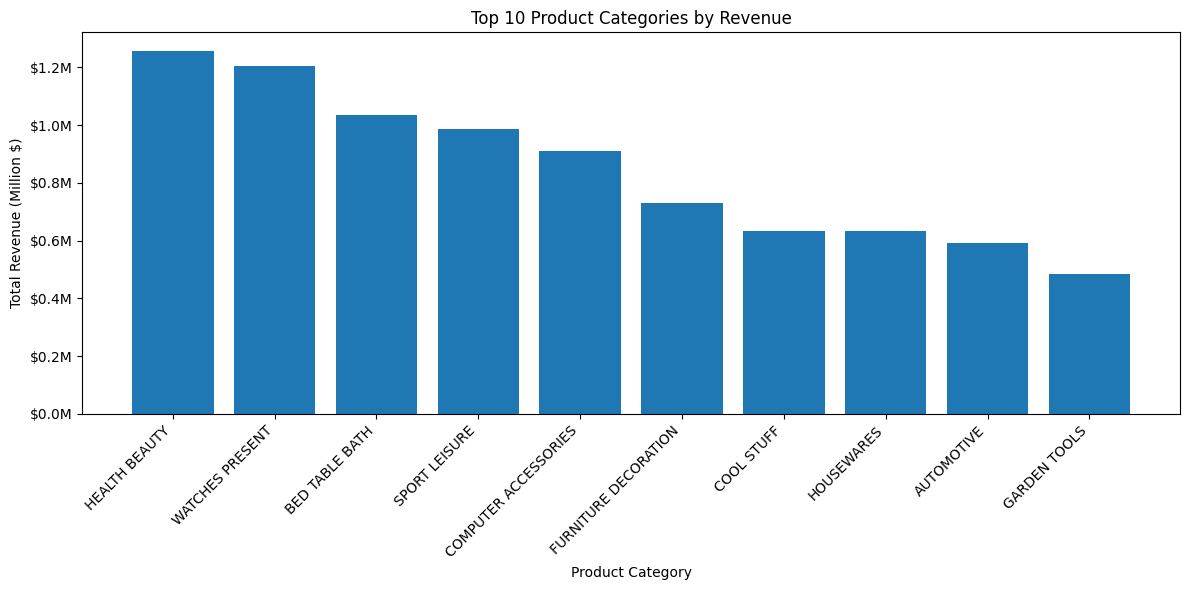

In [11]:
query = """SELECT UPPER(product_category), ROUND(SUM(price),2) AS total_revenue
FROM order_items
JOIN products ON order_items.product_id = products.product_id
GROUP BY product_category
ORDER BY total_revenue DESC
LIMIT 10;
 """
cur.execute(query)
data = cur.fetchall()

REVENUE_BY_PRODUCT_CATEGORY=pd.DataFrame(data,columns=['product_category','total_revenue'])


# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(REVENUE_BY_PRODUCT_CATEGORY['product_category'], REVENUE_BY_PRODUCT_CATEGORY['total_revenue'] / 1_000_000)
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (Million $)')
plt.title('Top 10 Product Categories by Revenue')
plt.xticks(rotation=45, ha='right')

# Formatting y-axis to show dollar amounts in millions
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.1f}M'))  # Format y-axis labels

plt.tight_layout()
plt.show()

The bar chart illustrates the revenue generated by the top 10 product categories. "HEALTH BEAUTY" leads with the highest total revenue at approximately $1,258,681, followed closely by "Watches present" and "bed table bath." These figures indicate significant consumer spending in these categories, suggesting targeted marketing and inventory management strategies could further capitalize on these trends.


### 4.Revenue Analysis:

- What is the total revenue generated each month?

In [12]:
query = """SELECT YEAR(order_purchase_timestamp) AS year, round(SUM(price),2) AS total_revenue
FROM order_items
JOIN orders ON order_items.order_id = orders.order_id
GROUP BY year
ORDER BY year;
 """
cur.execute(query)
data = cur.fetchall()

yearly_revenue=pd.DataFrame(data,columns=['year','total_revenue'])
yearly_revenue

,year,total_revenue
0,2016,49785.92
1,2017,6155806.98
2,2018,7386050.80


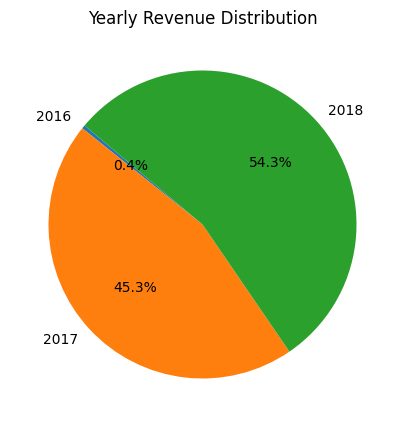

In [13]:

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(yearly_revenue['total_revenue'], labels=yearly_revenue['year'], autopct='%1.1f%%', startangle=140)
plt.title('Yearly Revenue Distribution')
plt.show()


The pie chart illustrates the distribution of total revenue across the years 2016, 2017, and 2018. The year 2018 accounts for the largest portion of revenue, making up approximately 54.5% of the total, followed by 2017 with around 45.5%. The year 2016 contributes a negligible amount, less than 1%, indicating a significant growth in revenue in the subsequent years. This trend highlights substantial business growth and increased sales over the years, particularly between 2017 and 2018.



### 5. Calculate the number of orders per month in 2018.

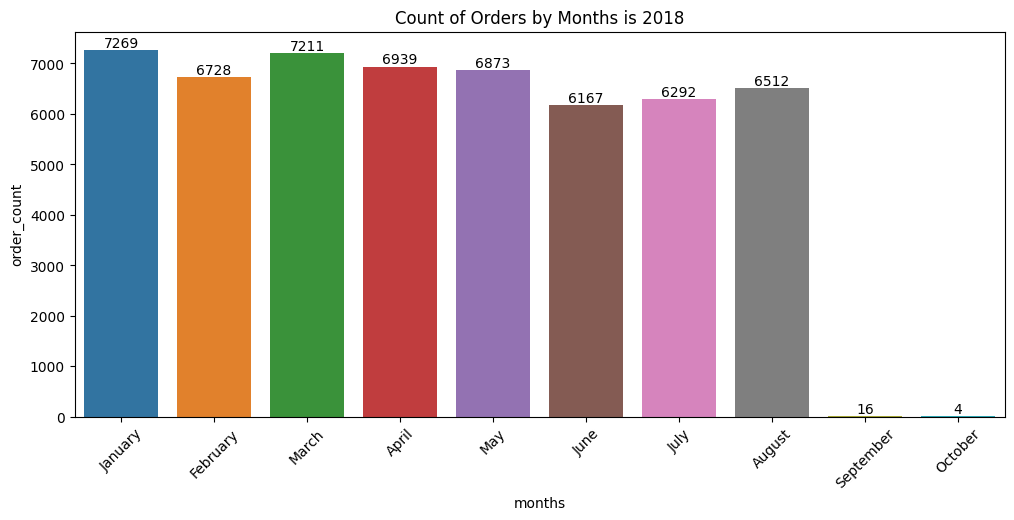

In [14]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January", "February","March","April","May","June","July","August","September","October"]

plt.figure(figsize=(12, 5))
ax = sns.barplot(x = df["months"],y =  df["order_count"], data = df, order = o)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")

plt.show()

## Advanced

### 1.Find the average number of products per order, grouped by customer city.

In [15]:

query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),0) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city", "average products/order"])
df.head(10)

,customer city,average products/order
0,celso ramos,7
1,padre carvalho,7
2,candido godoi,6
3,datas,6
4,matias olimpio,5
5,inconfidentes,4
6,morro de sao paulo,4
7,cidelandia,4
8,picarra,4
9,teixeira soares,4


### 2.Calculate the percentage of total revenue contributed by each product category.

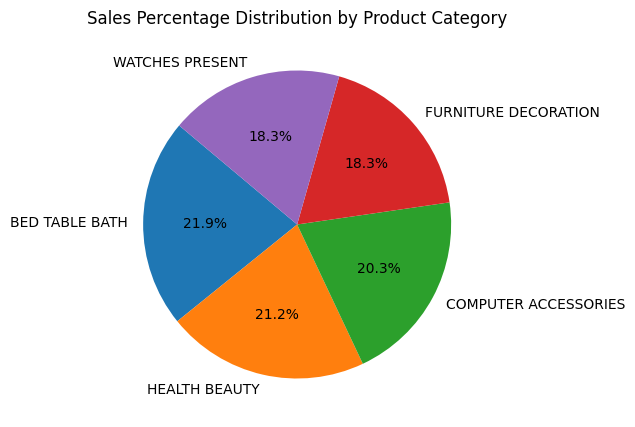

In [16]:
query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc
limit 5"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(df['percentage distribution'], labels=df['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Percentage Distribution by Product Category')
plt.show()

The pie chart illustrates the sales percentage distribution across various product categories. "Bed Table Bath" leads with 10.70% of total sales, followed closely by "Health Beauty" at 10.35% and "Computer Accessories" at 9.90%. "Furniture Decoration" accounts for 8.93% of sales, while "Watches Present" contributes a smaller, unspecified percentage. These insights highlight the top-performing categories, guiding strategic focus and resource allocation.


### 3.Identify the correlation between product price and the number of times a product has been purchased.

In [17]:
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157562


The correlation between product price and the number of times a product has been purchased is -0.11, indicating a weak negative relationship. This suggests that higher-priced products are slightly less frequently purchased, but the correlation is not strong enough to draw definitive conclusions. Further analysis may be needed to understand other influencing factors.

### 4.Calculate the moving average of order values for each customer over their order history.

In [18]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df



,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


###  5.Calculate the cumulative sales per month for each year.

In [19]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df



,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


### 6.Calculate the year-over-year growth rate of total sales.

In [20]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


### 7.Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [21]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

### 8.Identify the top 3 customers who spent the most money in each year.

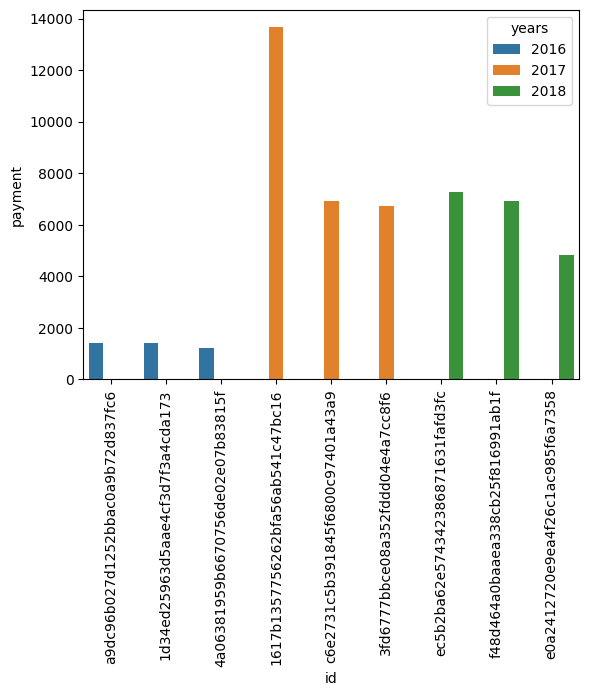

In [22]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()